# Import Libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer


from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_curve, roc_auc_score
import warnings

df = pd.read_csv('../../65 Years of Weather Data Bangladesh (1948 - 2013).csv')

# Category C

In [2]:
# Players to be selected
li = ["Ishurdi", "Jessore", "Chuadanga", "Satkhira"]

df_new=df[df.Station_Names.isin(li)]
df_new=df_new.drop(labels=["No","Max_Temp","Station_Names","YEAR","Month","ALT","Station_Number"], axis=1)
df_new.head()

,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,X_COR,Y_COR,LATITUDE,LONGITUDE,Period
3576,26.5,9.1,9.0,79.333333,0.8,1.053846,5.911111,0.0,0.0,23.65,88.81667,1989.01
3577,31.0,10.9,9.0,79.333333,0.5,1.053846,5.911111,0.0,0.0,23.65,88.81667,1990.01
3578,29.7,11.1,9.0,79.333333,0.3,1.053846,5.911111,0.0,0.0,23.65,88.81667,1991.01
3579,28.6,10.8,9.0,79.333333,0.1,1.053846,5.911111,0.0,0.0,23.65,88.81667,1992.01
3580,30.0,10.1,9.0,79.333333,0.4,1.053846,5.911111,0.0,0.0,23.65,88.81667,1993.01


In [3]:
z = df_new["Wind_Speed"]

df_new = df_new.drop(labels=["Wind_Speed","X_COR","Y_COR","Bright_Sunshine"], axis=1)
df_new['Wind_Speed'] = z
df_new.head()

,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Cloud_Coverage,LATITUDE,LONGITUDE,Period,Wind_Speed
3576,26.5,9.1,9.0,79.333333,1.053846,23.65,88.81667,1989.01,0.8
3577,31.0,10.9,9.0,79.333333,1.053846,23.65,88.81667,1990.01,0.5
3578,29.7,11.1,9.0,79.333333,1.053846,23.65,88.81667,1991.01,0.3
3579,28.6,10.8,9.0,79.333333,1.053846,23.65,88.81667,1992.01,0.1
3580,30.0,10.1,9.0,79.333333,1.053846,23.65,88.81667,1993.01,0.4


In [4]:
X = df_new.iloc[:,:-1]
Y = df_new.iloc[:,-1]

In [5]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2)

# Preprocessiong with Standard Scaler 

In [6]:
# Standard Scaler

from sklearn.preprocessing import StandardScaler

numeric=['Max_Temp', 'Min_Temp','Rainfall', 'Relative_Humidity', 'Cloud_Coverage', 'LATITUDE', 'LONGITUDE', 'Period']
# scaler = sc.fit_transform(trainX[numeric])

sc=StandardScaler()
scaler = sc.fit(trainX[numeric])
trainX_scaled = scaler.transform(trainX[numeric])
testX_scaled = scaler.transform(testX[numeric])


# Random Forest Regression

In [7]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(trainX, trainY) 

#  Prediction
Y_pred_RF = regressor.predict(testX)

df_temp = pd.DataFrame({'Actual': testY, 'Predicted': Y_pred_RF})
df_temp.head()

,Actual,Predicted
9742,7.900000,6.831000
9900,3.200000,2.441556
3796,0.930435,1.069696
10192,0.300000,0.367000
9297,1.200000,1.729000


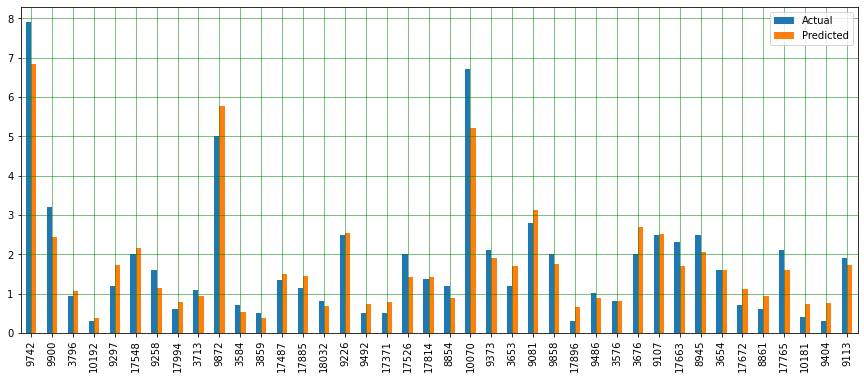

In [8]:
df_temp = df_temp.head(40)
df_temp.plot(kind='bar',figsize=(15,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# plt.show()

In [9]:
from sklearn.metrics import r2_score
score= r2_score(testY,Y_pred_RF)
print(score)

0.8180975723172736


In [10]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(testY, Y_pred_RF))  
print('Mean Squared Error:', metrics.mean_squared_error(testY, Y_pred_RF))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, Y_pred_RF)))

Mean Absolute Error: 0.38181873992694454
Mean Squared Error: 0.3277244212822822
Root Mean Squared Error: 0.5724722013183542


# XGBoost Regression

In [11]:
from xgboost import XGBRegressor

RegModel=XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=500, objective='reg:linear', booster='gbtree')
XGB=RegModel.fit(trainX_scaled,trainY)
prediction_XGB=XGB.predict(testX_scaled)

[19:13:42] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [12]:
df_temp = pd.DataFrame({'Actual': testY, 'Predicted': prediction_XGB})
df_temp.head()

,Actual,Predicted
9742,7.900000,7.702686
9900,3.200000,2.866471
3796,0.930435,1.014302
10192,0.300000,0.224754
9297,1.200000,1.936052


In [13]:
#Measuring Goodness of fit in Training data
from sklearn import metrics
print('R2 Value:',metrics.r2_score(testY, prediction_XGB))

print('Mean Absolute Error:', metrics.mean_absolute_error(testY, prediction_XGB))  
print('Mean Squared Error:', metrics.mean_squared_error(testY, prediction_XGB))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, prediction_XGB)))

R2 Value: 0.8132002462481999
Mean Absolute Error: 0.38056667384463544
Mean Squared Error: 0.33654768643747424
Root Mean Squared Error: 0.5801273019238745


In [14]:
parameters = {
    'n_estimators': [3000, 3500],
    'max_depth': [1,2,3,4],
}
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(XGB, parameters,cv=5,n_jobs=-1)
grid.fit(trainX_scaled, trainY)

print(grid.best_params_)

[19:14:33] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
{'max_depth': 4, 'n_estimators': 3500}


In [15]:
grid_predictionsXGB = grid.predict(testX_scaled) 
df_temp2 = pd.DataFrame({'Actual': testY, 'Predicted': grid_predictionsXGB})
df_temp2.head()

,Actual,Predicted
9742,7.900000,7.809764
9900,3.200000,2.788407
3796,0.930435,1.168998
10192,0.300000,0.203476
9297,1.200000,1.652366


In [16]:
#Measuring Goodness of fit in Training data
from sklearn import metrics

print('R2 Value:',metrics.r2_score(testY, grid_predictionsXGB))

print('Mean Absolute Error:', metrics.mean_absolute_error(testY, grid_predictionsXGB))  
print('Mean Squared Error:', metrics.mean_squared_error(testY, grid_predictionsXGB))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, grid_predictionsXGB)))

R2 Value: 0.843309527092924
Mean Absolute Error: 0.34733470215802
Mean Squared Error: 0.28230131509561474
Root Mean Squared Error: 0.5313203507260142


# MLP Regression

In [17]:
# MLPRegressor

from sklearn.neural_network import MLPRegressor

mlp_reg = MLPRegressor(hidden_layer_sizes=(150,100,50),
                       max_iter = 300,activation = 'relu',
                       solver = 'adam')

mlp_reg.fit(trainX_scaled, trainY)

MLPRegressor(hidden_layer_sizes=(150, 100, 50), max_iter=300)

In [18]:
y_pred = mlp_reg.predict(testX_scaled)
df_temp = pd.DataFrame({'Actual': testY, 'Predicted': y_pred})
df_temp.head()

,Actual,Predicted
9742,7.900000,7.477344
9900,3.200000,3.465165
3796,0.930435,0.824727
10192,0.300000,0.251268
9297,1.200000,2.026193


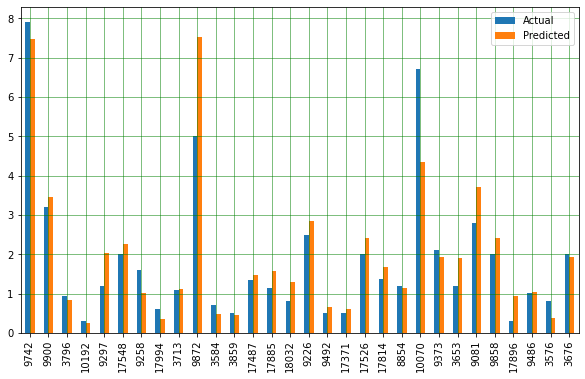

In [19]:
df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# plt.show()

Text(0, 0.5, 'Cost')

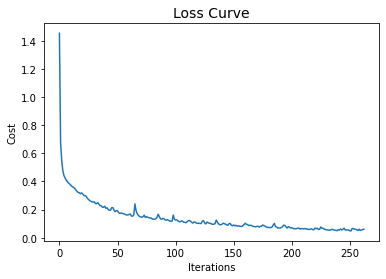

In [20]:
plt.plot(mlp_reg.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')

In [21]:
from sklearn.metrics import r2_score
score= r2_score(testY,y_pred)
score

0.7649243055856578

In [22]:
param_grid = {
    'hidden_layer_sizes': [(150, 100, 50)],
    'max_iter': [50, 100],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant','adaptive'],
}

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(mlp_reg, param_grid, n_jobs= -1, cv=5)
grid.fit(trainX_scaled, trainY)

print(grid.best_params_) 

{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'adaptive', 'max_iter': 100, 'solver': 'adam'}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [23]:
grid_predictions = grid.predict(testX_scaled) 
df_temp2 = pd.DataFrame({'Actual': testY, 'Predicted': grid_predictions})
df_temp2.head()

,Actual,Predicted
9742,7.900000,6.925424
9900,3.200000,2.834758
3796,0.930435,0.827174
10192,0.300000,0.083444
9297,1.200000,1.716401


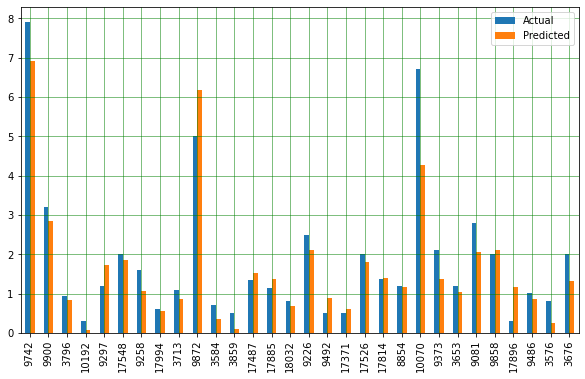

In [24]:
df_temp2 = df_temp2.head(30)
df_temp2.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# plt.show()

In [25]:
#Measuring Goodness of fit in Training data
from sklearn import metrics
print('R2 Value:',metrics.r2_score(testY, grid_predictions))

print('Mean Absolute Error:', metrics.mean_absolute_error(testY, grid_predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(testY, grid_predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, grid_predictions)))

R2 Value: 0.7649211827905907
Mean Absolute Error: 0.43019906479442194
Mean Squared Error: 0.42352963787845566
Root Mean Squared Error: 0.6507915471780927


In [26]:
mean_pred=( Y_pred_RF+grid_predictionsXGB+ grid_predictions)/3
df_temp2 = pd.DataFrame({'Actual': testY, 'pred_RF': Y_pred_RF,'pred_XGB':prediction_XGB,'pred_MLP': grid_predictions,'mean_pred':mean_pred})
df_temp2.head()

,Actual,pred_RF,pred_XGB,pred_MLP,mean_pred
9742,7.900000,6.831000,7.702686,6.925424,7.188729
9900,3.200000,2.441556,2.866471,2.834758,2.688240
3796,0.930435,1.069696,1.014302,0.827174,1.021956
10192,0.300000,0.367000,0.224754,0.083444,0.217973
9297,1.200000,1.729000,1.936052,1.716401,1.699256


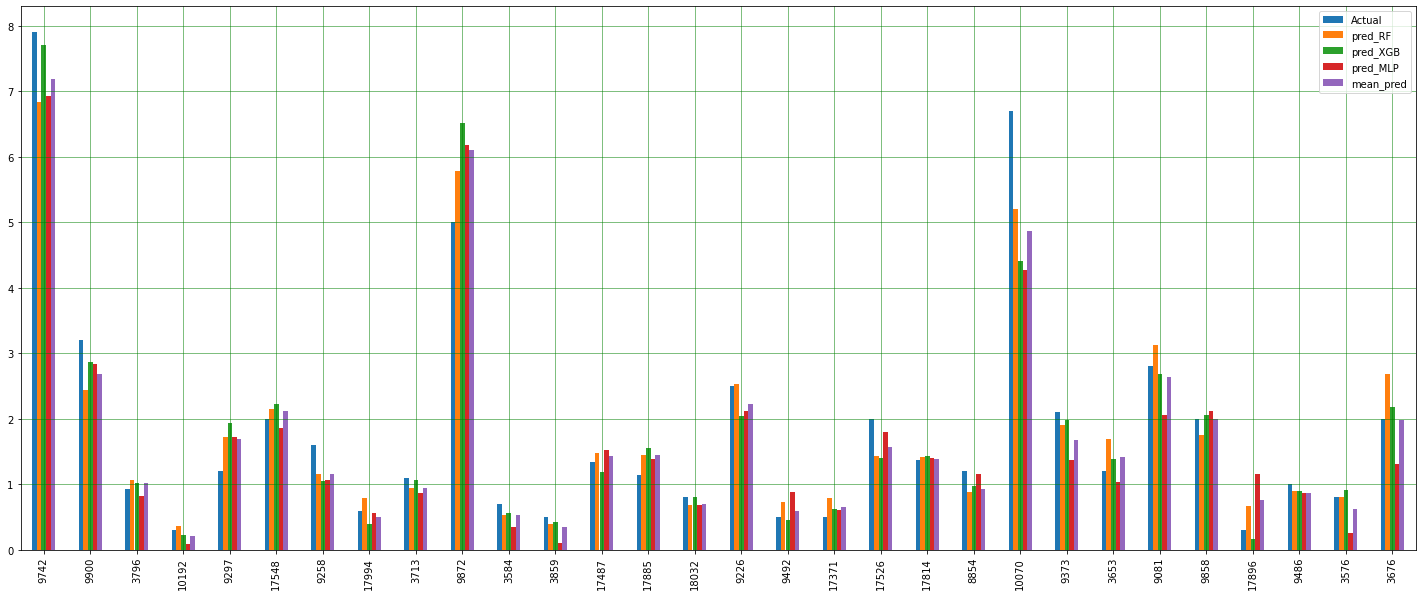

In [27]:
df_temp2 = df_temp2.head(30)
df_temp2.plot(kind='bar',figsize=(25,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

In [28]:
mean_pred=( Y_pred_RF+prediction_XGB+ grid_predictions)/3
df_temp2 = pd.DataFrame({'Actual': testY, 'mean_pred':mean_pred})
df_temp2.head()

,Actual,mean_pred
9742,7.900000,7.153037
9900,3.200000,2.714262
3796,0.930435,0.970390
10192,0.300000,0.225066
9297,1.200000,1.793818


In [29]:
print('R2 Value:',metrics.r2_score(testY, mean_pred)*100,"%")
print('Mean Absolute Error:', metrics.mean_absolute_error(testY, mean_pred))  
print('Mean Square83.44d Error:', metrics.mean_squared_error(testY, mean_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, mean_pred)))

R2 Value: 83.44201493308299 %
Mean Absolute Error: 0.36014458099464125
Mean Squared Error: 0.29831685826210397
Root Mean Squared Error: 0.5461839051657454


In [30]:
# from sklearn.model_selection import train_test_split
# trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2)

# Ridge Regression 

In [31]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[0.001,0.01,0.1]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(trainX,trainY)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0.001, 0.01, 0.1]},
             scoring='neg_mean_squared_error')

In [32]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 0.1}
-1.0040709369019087


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Wind_Speed', ylabel='Density'>

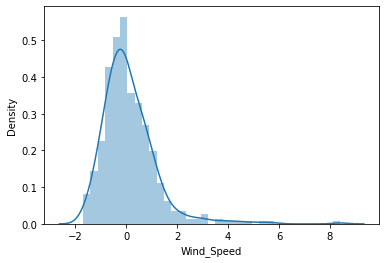

In [33]:
prediction_ridge=ridge_regressor.predict(testX)
import seaborn as sns

sns.distplot(testY-prediction_ridge)

In [34]:
df_temp2 = pd.DataFrame({'Actual': testY, 'RR_pred':prediction_ridge})
df_temp2.head()

,Actual,RR_pred
9742,7.900000,2.582428
9900,3.200000,2.266162
3796,0.930435,1.043022
10192,0.300000,1.327465
9297,1.200000,2.117676


In [35]:
print('R2 Value:',metrics.r2_score(testY, prediction_ridge)*100,"%")
print('Mean Absolute Error:', metrics.mean_absolute_error(testY, prediction_ridge))  
print('Mean Squared Error:', metrics.mean_squared_error(testY, prediction_ridge))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, prediction_ridge)))

R2 Value: 34.76685650274858 %
Mean Absolute Error: 0.7325687824868743
Mean Squared Error: 1.1752726158415596
Root Mean Squared Error: 1.084099910451781


In [36]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(trainX,trainY)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 119.11285110972642, tolerance: 0.23477137010519564
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118.22605286925045, tolerance: 0.24371650943858028
  model = cd_fast.enet_coordinate_descent(


{'alpha': 1e-08}
-1.0040796183499148


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Wind_Speed', ylabel='Density'>

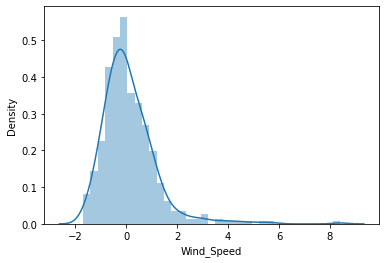

In [37]:
prediction_lasso=lasso_regressor.predict(testX)
import seaborn as sns

sns.distplot(testY-prediction_ridge)

In [38]:
df_temp2 = pd.DataFrame({'Actual': testY, 'RR_pred':prediction_lasso})
df_temp2.head()

,Actual,RR_pred
9742,7.900000,2.585137
9900,3.200000,2.267590
3796,0.930435,1.040236
10192,0.300000,1.330208
9297,1.200000,2.118001


In [39]:
print('R2 Value:',metrics.r2_score(testY, prediction_lasso)*100,"%")
print('Mean Absolute Error:', metrics.mean_absolute_error(testY, prediction_lasso))  
print('Mean Squared Error:', metrics.mean_squared_error(testY, prediction_lasso))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, prediction_lasso)))

R2 Value: 34.7723247900092 %
Mean Absolute Error: 0.7326908127844345
Mean Squared Error: 1.175174096470448
Root Mean Squared Error: 1.084054471173127


In [40]:
# from sklearn.model_selection import train_test_split
# trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2)

# improve accuracy 

In [41]:
df_new.head(3)

,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Cloud_Coverage,LATITUDE,LONGITUDE,Period,Wind_Speed
3576,26.5,9.1,9.0,79.333333,1.053846,23.65,88.81667,1989.01,0.8
3577,31.0,10.9,9.0,79.333333,1.053846,23.65,88.81667,1990.01,0.5
3578,29.7,11.1,9.0,79.333333,1.053846,23.65,88.81667,1991.01,0.3


In [42]:
print(f'Dataset size: {trainX.shape}')

Dataset size: (2016, 8)


In [43]:
print(f'Dataset size: {testX.shape}')

Dataset size: (504, 8)


In [44]:
df_new.isnull().sum().sort_values(ascending=False)/df_new.shape[0]

Wind_Speed           0.0
Period               0.0
LONGITUDE            0.0
LATITUDE             0.0
Cloud_Coverage       0.0
Relative_Humidity    0.0
Rainfall             0.0
Min_Temp             0.0
Max_Temp             0.0
dtype: float64

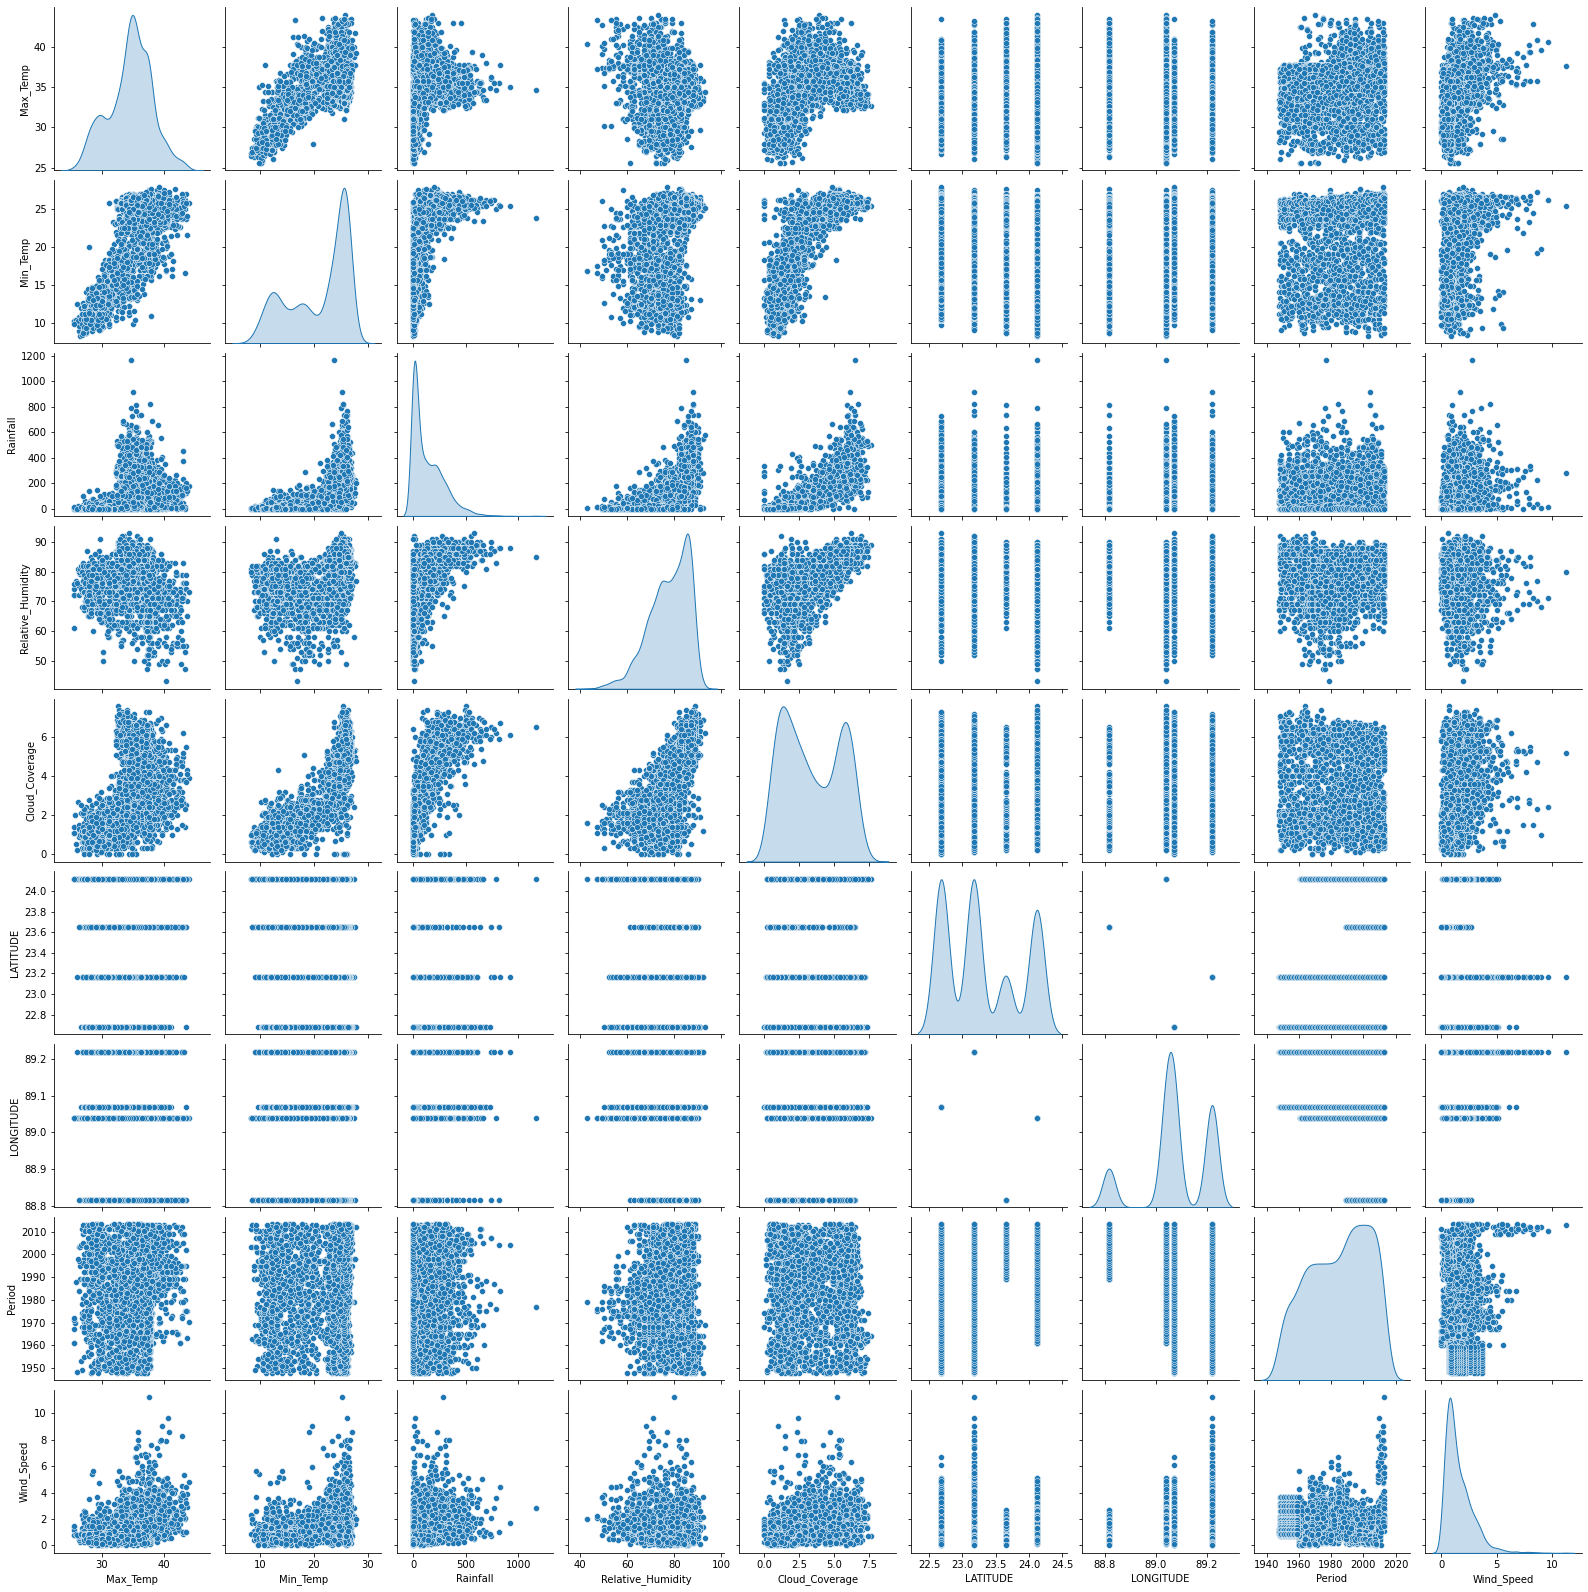

In [45]:
import seaborn as sns
sns.pairplot(data=df_new, diag_kind='kde')